In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('./abalone.csv', sep=';')
print('Filas', df.shape[0], 'Columnas', df.shape[1])
df.sample(7)

Filas 3676 Columnas 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
1388,M,0.630,0.495,0.160,1.0930,0.4970,0.2210,0.3150,12,1
2911,F,0.580,0.440,0.125,0.7855,0.3630,0.1955,0.1950,11,0
2716,I,0.340,0.245,0.085,0.2015,0.1005,0.0380,0.0530,6,0
1739,M,0.675,0.525,0.160,12.8350,0.5720,0.2755,0.3545,13,1
3534,M,0.245,0.180,0.065,0.0635,0.0245,0.0135,0.0200,4,0
2390,F,0.455,0.350,0.125,0.4485,0.1585,0.1020,0.1335,16,1
2356,M,0.575,0.470,0.150,11.4150,0.4515,0.2040,0.4000,13,1


In [10]:
X = df.drop(['Adulto', 'Sex'], axis=1)
y = df['Adulto']

In [11]:
print(y.groupby(y).count())

Adulto
0    2073
1    1603
Name: Adulto, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=56)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2573, 8) (1103, 8) (2573,) (1103,)


In [13]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [18]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = folds, scoring='accuracy')
    k_scores.append(scores.mean())

In [19]:
for i, value in enumerate(k_scores):
    print('k=', i+1, ':', '%.4f'%value, '"""', end='', sep='')

k=1:0.8492"""k=2:0.8496"""k=3:0.8838"""k=4:0.8768"""k=5:0.8900"""k=6:0.8885"""k=7:0.8920"""k=8:0.8912"""k=9:0.8947"""k=10:0.8935"""k=11:0.8920"""k=12:0.8920"""k=13:0.8966"""k=14:0.8908"""k=15:0.8935"""k=16:0.8892"""k=17:0.8947"""k=18:0.8923"""k=19:0.8951"""k=20:0.8939"""k=21:0.8927"""k=22:0.8916"""k=23:0.8927"""k=24:0.8923"""k=25:0.8951"""k=26:0.8927"""k=27:0.8920"""k=28:0.8900"""k=29:0.8912"""k=30:0.8888"""

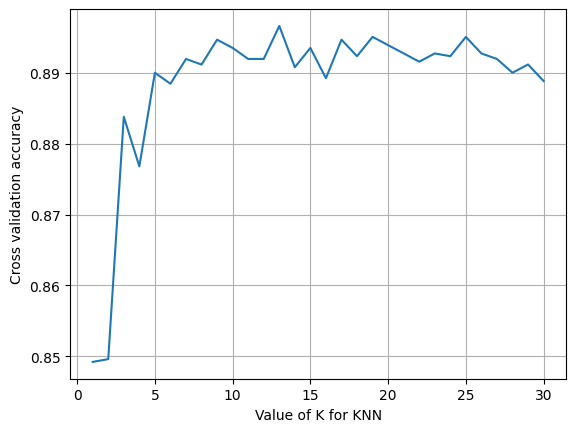

In [20]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation accuracy')
plt.grid()

In [21]:
from sklearn.model_selection import GridSearchCV

In [27]:
knn = KNeighborsClassifier()

In [28]:
k_range=list(range(1,31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [29]:
folds = StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [30]:
grid = GridSearchCV(knn,param_grid,cv=folds, scoring='accuracy')

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [32]:
pd.DataFrame(grid.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002296,0.004173,0.004520,0.001181,1,{'n_neighbors': 1},0.879845,0.860465,0.813953,0.856031,0.824903,0.821012,0.856031,0.840467,0.867704,0.871595,0.849201,0.021695,30
1,0.001540,0.001739,0.004445,0.000349,2,{'n_neighbors': 2},0.844961,0.852713,0.833333,0.844358,0.832685,0.852140,0.863813,0.828794,0.867704,0.875486,0.849599,0.014996,29
2,0.000837,0.000018,0.004119,0.000040,3,{'n_neighbors': 3},0.922481,0.875969,0.856589,0.887160,0.887160,0.887160,0.875486,0.867704,0.883268,0.894942,0.883792,0.016687,27
3,0.000841,0.000018,0.004225,0.000049,4,{'n_neighbors': 4},0.906977,0.879845,0.841085,0.883268,0.863813,0.883268,0.875486,0.863813,0.875486,0.894942,0.876798,0.017173,28
4,0.000829,0.000007,0.004238,0.000039,5,{'n_neighbors': 5},0.934109,0.883721,0.860465,0.887160,0.898833,0.887160,0.883268,0.867704,0.894942,0.902724,0.890008,0.019184,23


In [33]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [34]:
grid.best_score_

np.float64(0.8966171990468436)

In [35]:
grid.best_params_

{'n_neighbors': 13}

In [36]:
y_pred_grid = grid.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[566  79]
 [ 52 406]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       645
           1       0.84      0.89      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



In [40]:
from sklearn.model_selection import RandomizedSearchCV


In [41]:
k_range = list(range(1,31))
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [42]:
random = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=folds, scoring='accuracy', random_state=10)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   random_state=10, scoring='accuracy')

In [43]:
pd.DataFrame(random.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001641,0.002010,0.005852,0.001165,21,{'n_neighbors': 21},0.922481,0.868217,0.872093,0.898833,0.891051,0.898833,0.879377,0.887160,0.898833,0.910506,0.892738,0.015974,6
1,0.000825,0.000071,0.004308,0.000086,8,{'n_neighbors': 8},0.937984,0.883721,0.875969,0.879377,0.891051,0.910506,0.883268,0.879377,0.879377,0.891051,0.891168,0.018253,14
2,0.000799,0.000022,0.004133,0.000046,6,{'n_neighbors': 6},0.930233,0.875969,0.856589,0.883268,0.894942,0.898833,0.887160,0.875486,0.883268,0.898833,0.888458,0.018433,17
3,0.000823,0.000036,0.004048,0.000102,3,{'n_neighbors': 3},0.922481,0.875969,0.856589,0.887160,0.887160,0.887160,0.875486,0.867704,0.883268,0.894942,0.883792,0.016687,18
4,0.000827,0.000045,0.004190,0.000173,4,{'n_neighbors': 4},0.906977,0.879845,0.841085,0.883268,0.863813,0.883268,0.875486,0.863813,0.875486,0.894942,0.876798,0.017173,19


In [44]:
print(random.best_estimator_)
print(random.best_score_)
print(random.best_params_)


KNeighborsClassifier(n_neighbors=13)
0.8966171990468436
{'n_neighbors': 13}
